First lets import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy import stats

%matplotlib inline


Import CSV dataset

In [2]:
dataset = pd.read_csv("..\\data\\housing_ext.csv")

# Data preprocessing
We check our data for NAN values

In [3]:
dataset.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

# Exploring the dataset
The features can be summarized as follows:
CRIM: This is the per capita crime rate by town
ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
INDUS: This is the proportion of non-retail business acres per town.
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
NOX: This is the nitric oxides concentration (parts per 10 million)
RM: This is the average number of rooms per dwelling
AGE: This is the proportion of owner-occupied units built prior to 1940
DIS: This is the weighted distances to five Boston employment centers
RAD: This is the index of accessibility to radial highways
TAX: This is the full-value property-tax rate per $10,000
PTRATIO: This is the pupil-teacher ratio by town
B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
LSTAT: This is the percentage lower status of the population
MEDV: This is the median value of owner-occupied homes in $1000s

In [4]:
dataset.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Now, we create a correlation matrix that measures the linear relationships between the variables.

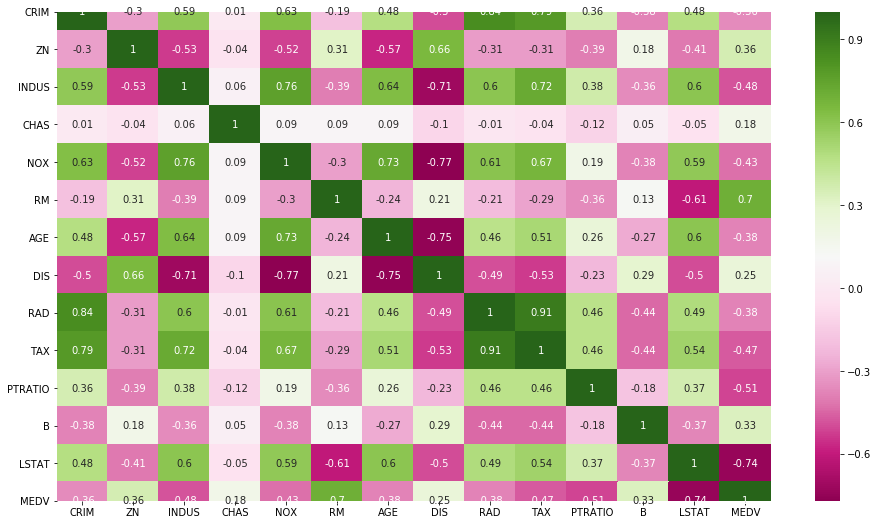

In [5]:
fig, ax = plt.subplots(figsize=(16,9))
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, ax=ax,cmap='PiYG')

Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. 
By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT
has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features 
RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. 
Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

Plot some of the Data

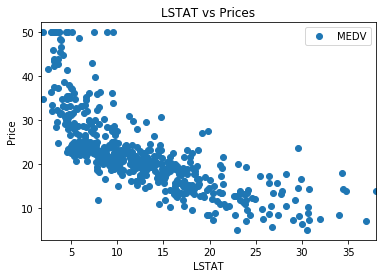

In [6]:
dataset.plot(x='LSTAT', y='MEDV', style='o')
plt.title('LSTAT vs Prices')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

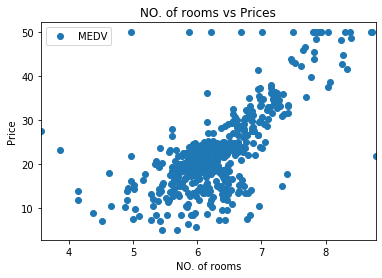

In [7]:
dataset.plot(x='RM', y='MEDV', style='o')
plt.title('NO. of rooms vs Prices')
plt.xlabel('NO. of rooms')
plt.ylabel('Price')
plt.show()

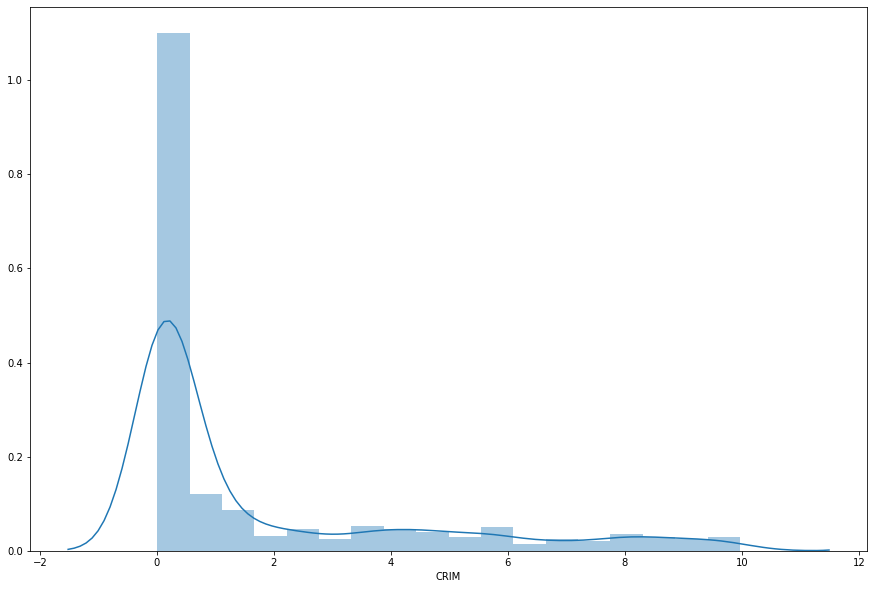

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['CRIM'])


# Linear Regression
First we train a linear regression model to predict Price of house based on number of Rooms

Our next step is to divide the data into “attributes” and “labels”.

In [9]:
X = dataset['RM'].values.reshape(-1,1)
y = dataset['MEDV'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


Finally we train our linear regression algorithm
First we import and instantiate LinearRegression class

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We find out the slope and intercept of our trained algorithm

In [12]:
print('intercept : ',regressor.intercept_)
print('slope: ',regressor.coef_)

intercept :  [-36.66357315]
slope:  [[9.39289524]]



Now we make some predictions

In [13]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values

In [14]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,27.5,-3.215473
1,21.6,22.192308
2,17.7,23.225527
3,24.3,20.313729
4,22.2,22.661953
...,...,...
97,36.1,31.303417
98,14.2,19.750156
99,18.3,17.758862
100,23.5,22.417738


We can also visualize comparison result as a bar graph using the below script 

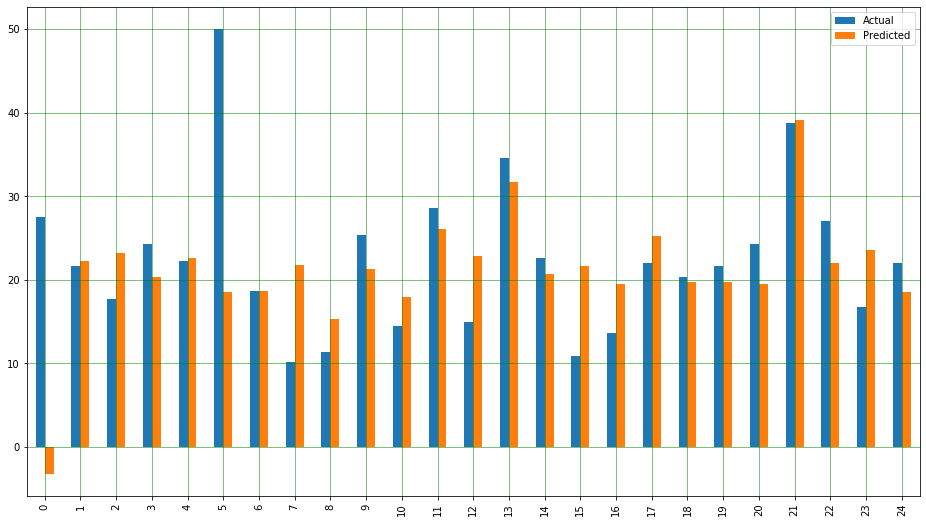

In [15]:
df.head(25).plot(kind='bar', figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='.5', color='black')
plt.show()

Let's plot our straight line with the test data :

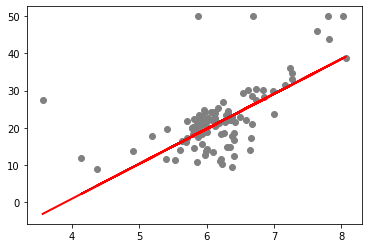

In [16]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred,color='red', linewidth=2)
plt.show()

The final step is to evaluate the performance of the algorithm.
This step is particularly important to compare how well 
different algorithms perform on a particular dataset.
For regression algorithms, three evaluation metrics are commonly used

1.)Mean Absolute Error
2.)Mean Squared Error
3.)Root Mean Squared Error

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.538993630294772
Mean Squared Error: 49.359238697733865
Root Mean Squared Error: 7.025613047822508


In [18]:
#mean value of prices
print("Mean value of house prices", np.mean(y))
print("Median value of house prices", np.median(y))

Mean value of house prices 22.532806324110677
Median value of house prices 21.2


As we can see Root Mean Squared Error is 9.35 which is about 40% of Mean of the dependent Variable
Meaning our model is not accurate




# Multiple Linear Regression
 Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression
 The steps to perform multiple linear regression are almost similar to that of simple linear regression.
 
 

Our next step is to divide the data into “attributes” and “labels”.

In [19]:
#X = dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV'].values
print("Boston housing dataset has {} data points with {} variables each.".format(*dataset.shape))

Boston housing dataset has 506 data points with 14 variables each.


Lets see some distributions

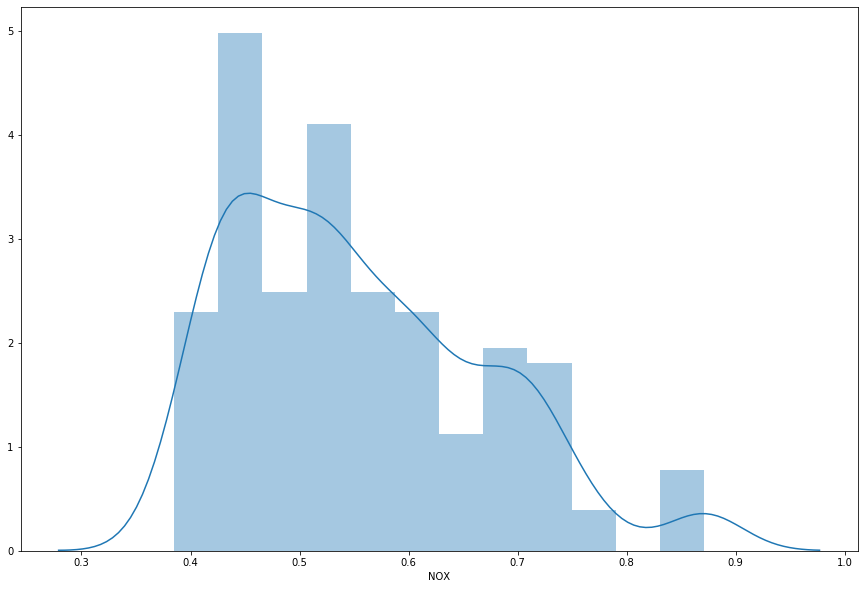

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['NOX'])


Now we split data inti traaining and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now let's Train our Model

In [22]:
m_regressor = LinearRegression()
m_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all 
the attributes. To see what coefficients our regression model has chosen, execute the following script

In [23]:
coeff_df = pd.DataFrame(m_regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.307943
ZN,0.042308
INDUS,0.018916
CHAS,2.476545
NOX,-14.359647
RM,3.751351
AGE,-0.000445
DIS,-1.294458
RAD,0.248268
TAX,-0.010794


Now lets do predictions on our test dataset

In [24]:
y_pred = m_regressor.predict(X_test)

Check the difference between the actual value and predicted value.

In [25]:
m_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
m_df1 = m_df.head(30)
m_df1

,Actual,Predicted
0,22.6,24.882042
1,50.0,22.415103
2,23.0,29.696396
3,8.3,13.845242
4,21.2,21.461861
5,19.9,19.364591
6,20.6,19.923117
7,18.7,21.466239
8,16.1,18.213598
9,18.6,19.902149


lets plot the comparison

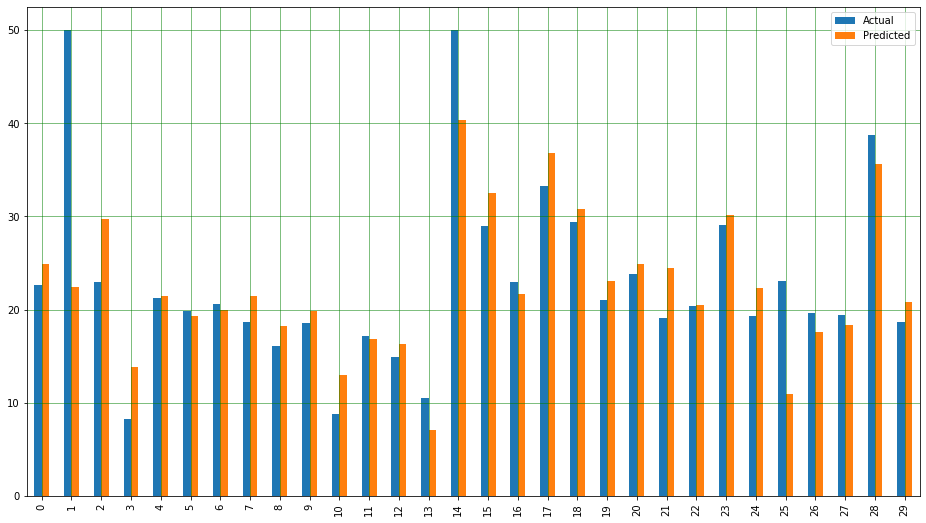

In [26]:
m_df1.plot(kind='bar',figsize=(16,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the graph we can see that our predictions are good enough but has several outliers
We Calculate MAE, MSE, RMSE

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.8566274452600546
Mean Squared Error: 34.79096495811129
Root Mean Squared Error: 5.898386640269633


In [28]:
#mean value of prices
print("Mean value of house prices", np.mean(y))
print("Median value of house prices", np.median(y))

Mean value of house prices 22.532806324110677
Median value of house prices 21.2


As we can see RMSE is about 20% of the mean of dependent variable
This means that our algorithm was not very accurate but can still make reasonably good predictions.


# Selecting Features and removing outliers

Now, we create a correlation matrix that measures the linear relationships between the variables.

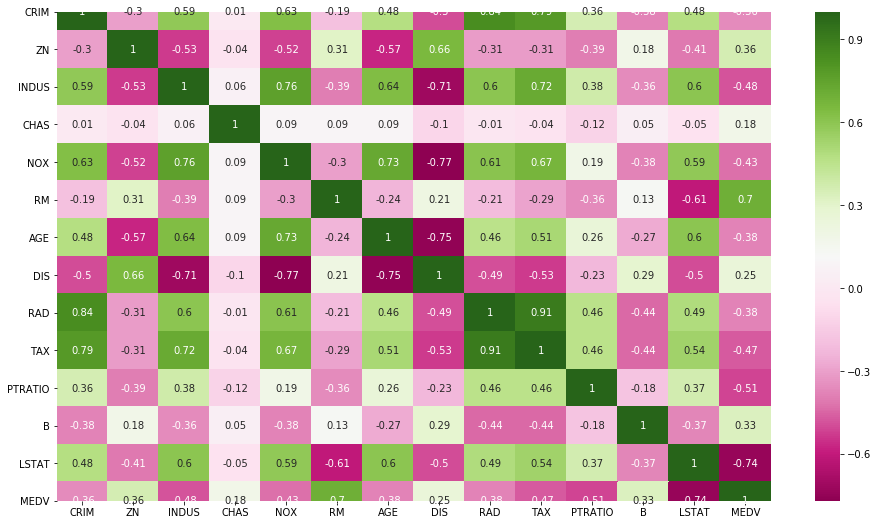

In [29]:
fig, ax = plt.subplots(figsize=(16,9))
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, ax=ax,cmap='PiYG')

Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. 
By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT
has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features 
RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. 
Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.


Removing outliers using IQR method

In [46]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset_o = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

Now we will construct features and target excluding RAD and DIS

In [47]:
s_features = dataset_o.drop(['MEDV', 'RAD', 'DIS'], axis=1)
target = dataset_o['MEDV']
s_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,273.0,21.0,393.45,6.48


In [48]:
X_train, X_test, y_train, y_test = train_test_split(s_features, target, test_size=0.2, random_state=50)

In [49]:
p_regressor = LinearRegression(normalize=True)
p_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [50]:
p_regressor.coef_

array([ 3.03635301e-01, -5.33945136e-02,  1.70812917e-02,  3.55271368e-15,
        6.16522742e-01,  5.87690405e+00, -4.26004847e-02, -6.94036761e-03,
       -5.84810366e-01,  1.07617481e-02, -1.72331430e-01])

In [74]:
y_pred = p_regressor.predict(X_test)

In [75]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.781633755851311
